In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [2]:
tf.version

<module 'tensorflow._api.v2.version' from 'C:\\Python312\\Lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>

In [3]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
#Lets explore our dataset
print(f"X_train Shape : {X_train.shape}")
print(f"y_train Shape : {y_train.shape}")
print(f"X_test Shape : {X_test.shape}")
print(f"y_test Shape : {y_test.shape}")

X_train Shape : (60000, 28, 28)
y_train Shape : (60000,)
X_test Shape : (10000, 28, 28)
y_test Shape : (10000,)


In [5]:
#Checking out the output labels
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


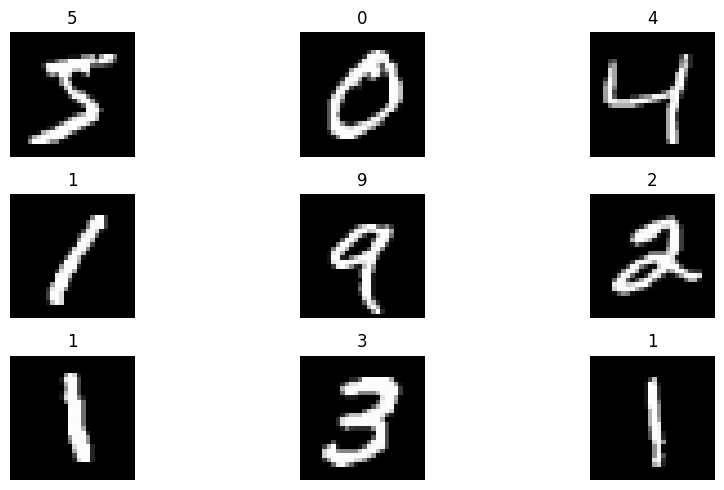

In [6]:
#Seeing the dataset, in its original image format
fig, axes = plt.subplots(3, 3, figsize=(10,5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(y_train[i])
    ax.axis("off")
plt.tight_layout()
plt.show()

In [7]:
#Scaling the data
X_train = X_train/255.0
X_test = X_test/255.0
print(f"X_train : {np.min(X_train)}, {np.max(X_train)}")
print(f"X_test : {np.min(X_test)}, {np.max(X_test)}")

X_train : 0.0, 1.0
X_test : 0.0, 1.0


In [8]:
#Creating the architecture
model = Sequential([
            Flatten(input_shape = (28, 28)),
            Dense(units=256, activation='relu'),
            Dense(units=128, activation='relu'),
            Dense(units=128, activation='relu'),
            Dense(units=10, activation='linear')
])
model.summary()

C:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 251,658 (983.04 KB)

 Trainable params: 251,658 (983.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#Compiling the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics = ['accuracy']
)

In [10]:
#Training the model
model.fit(
    X_train, y_train,
    epochs=20,
    verbose=1,
    shuffle=True
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8874 - loss: 0.3690
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9710 - loss: 0.0931
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9802 - loss: 0.0618
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9846 - loss: 0.0477
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9869 - loss: 0.0390
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9907 - loss: 0.0286
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9919 - loss: 0.0267
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9932 - loss: 0.0207
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9938 - loss: 0.0197
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9940 - loss: 0.0180
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9947 - loss: 0.0163
Epoch 12/20
1875/1875 ━━━━━━━━

In [11]:
#Predicting test data
y_pred_training = model.predict(
                    X_train,
                    verbose = 1
)
y_pred = model.predict(
            X_test,
            verbose=1
)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 


In [12]:
#Evaluating Accuracy
print(pd.DataFrame([model.evaluate(
    X_train,
    y_train,
    verbose=1,
    return_dict=True
)]))
print(pd.DataFrame([model.evaluate(
    X_test,
    y_test,
    verbose=1,
    return_dict=True
)]))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9977 - loss: 0.0081
   accuracy      loss
0  0.997417  0.008656
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9786 - loss: 0.1363   
   accuracy      loss
0    0.9816  0.114553


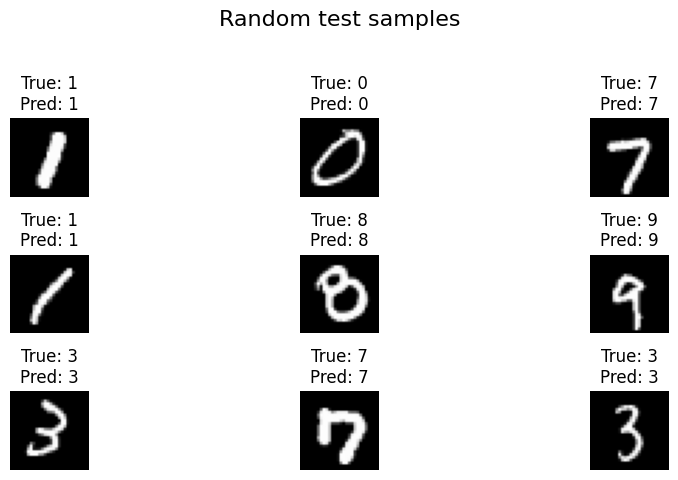

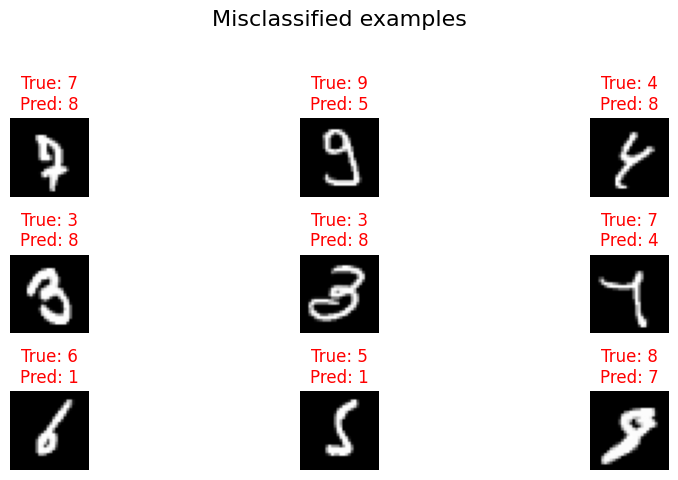

In [13]:
#Plotting Results
y_pred_labels = np.argmax(y_pred, axis=1) 

num_random = 9
rand_idxs = np.random.choice(len(X_test), size=num_random, replace=False)

fig, axes = plt.subplots(3, 3, figsize=(10, 5))
for ax, idx in zip(axes.flat, rand_idxs):
    ax.imshow(X_test[idx], cmap='gray')
    ax.set_title(f"True: {y_test[idx]}\nPred: {y_pred_labels[idx]}")
    ax.axis('off')
plt.suptitle("Random test samples", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

mis_idxs = np.where(y_pred_labels != y_test)[0]

num_wrong = min(9, len(mis_idxs))
show_wrong = np.random.choice(mis_idxs, num_wrong, replace=False)

fig, axes = plt.subplots(3, 3, figsize=(10, 5))
for ax, idx in zip(axes.flat, show_wrong):
    ax.imshow(X_test[idx], cmap='gray')
    ax.set_title(f"True: {y_test[idx]}\nPred: {y_pred_labels[idx]}", color='red')
    ax.axis('off')
plt.suptitle("Misclassified examples", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
